# Linear Regression Analysis of Horsepower vs. Price


In [34]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
auto = pd.read_csv("Auto.csv")

# Convert horsepower to numeric if needed
auto["horsepower"] = pd.to_numeric(auto["horsepower"], errors="coerce")

# Drop missing values
auto = auto.dropna()

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [35]:
X = auto["horsepower"]
y = auto["mpg"]

# Add constant
X_const = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X_const).fit()

# Regression summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           7.03e-81
Time:                        13:08:32   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
new_hp_const = pd.DataFrame({
    "const": [1],
    "horsepower": [98]
})

prediction = model.get_prediction(new_hp_const)
prediction.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


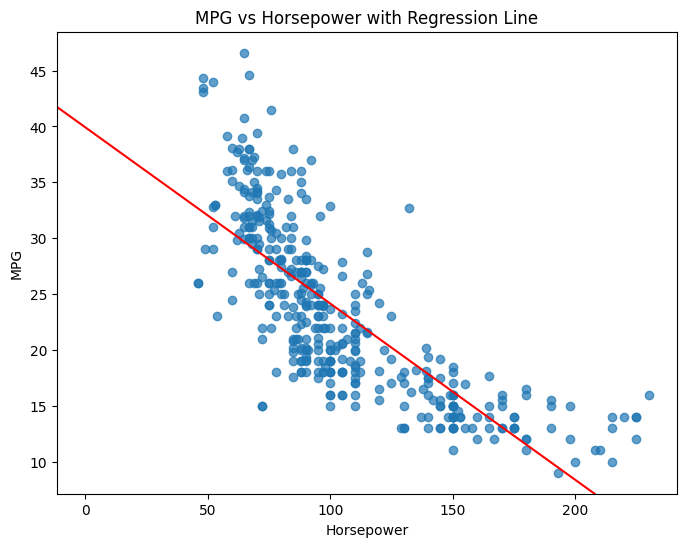

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(auto["horsepower"], auto["mpg"], alpha=0.7)

intercept = model.params["const"]
slope = model.params["horsepower"]

ax.axline((0, intercept), slope=slope, color="red")

ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
ax.set_title("MPG vs Horsepower with Regression Line")

plt.show()

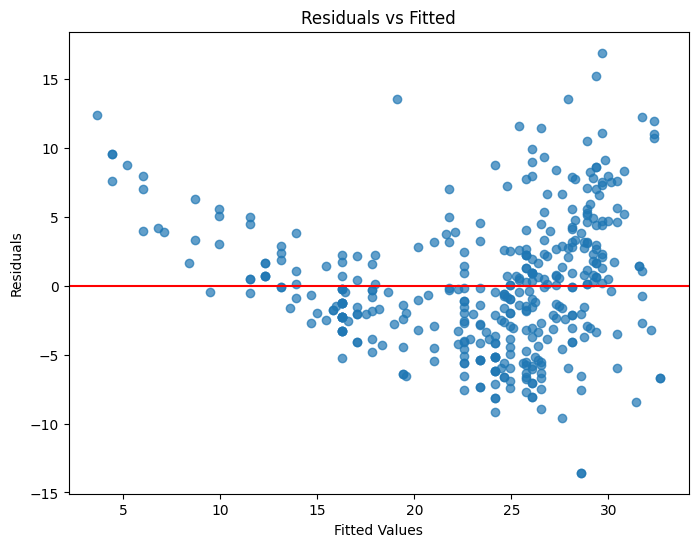

In [38]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(model.fittedvalues, model.resid, alpha=0.7)
ax.axhline(0, color="red")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Fitted")

plt.show()

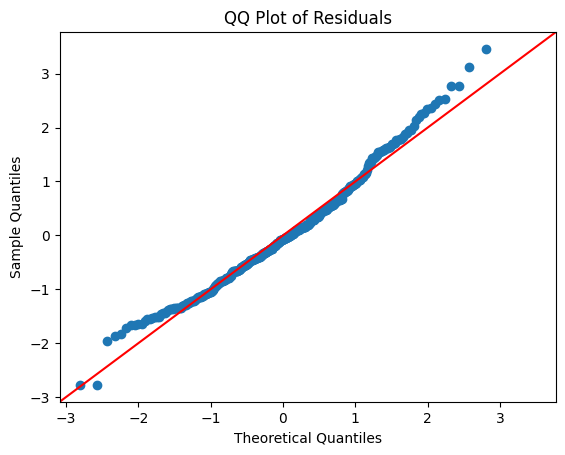

In [39]:
sm.qqplot(model.resid, line="45", fit=True)
plt.title("QQ Plot of Residuals")
plt.show()

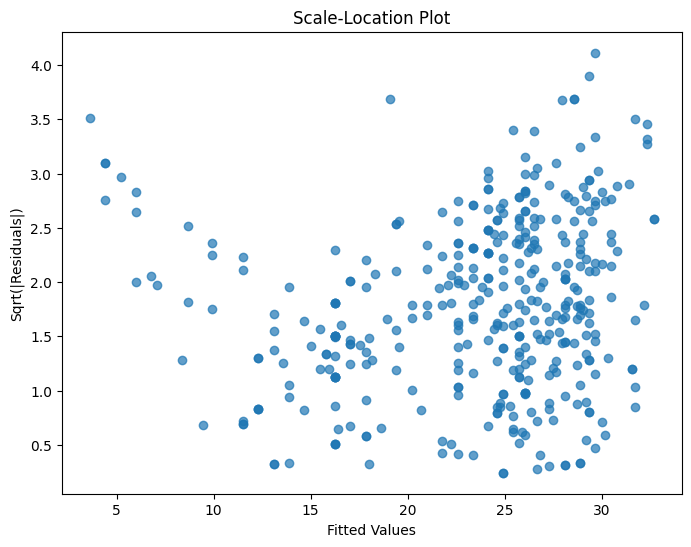

In [40]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(model.fittedvalues, np.sqrt(np.abs(model.resid)), alpha=0.7)
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Sqrt(|Residuals|)")
ax.set_title("Scale-Location Plot")
plt.show()